In [1]:
#Importation of the dataset and pretreatment of the data


import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data=pd.read_excel("titanic.xls")
print(data.columns)
data=data.drop(["name","sibsp","parch","body","boat","home.dest","cabin","ticket"], axis=1)
encoder=LabelEncoder()
data["sex"]=encoder.fit_transform((data["sex"]))
data["embarked"]=encoder.fit_transform((data["embarked"]))
data=data.dropna(axis=0)


X=data.drop("survived", axis=1)
y=data["survived"]

print(X)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
      pclass  sex      age      fare  embarked
0          1    0  29.0000  211.3375         2
1          1    1   0.9167  151.5500         2
2          1    0   2.0000  151.5500         2
3          1    1  30.0000  151.5500         2
4          1    0  25.0000  151.5500         2
...      ...  ...      ...       ...       ...
1301       3    1  45.5000    7.2250         0
1304       3    0  14.5000   14.4542         0
1306       3    1  26.5000    7.2250         0
1307       3    1  27.0000    7.2250         0
1308       3    1  29.0000    7.8750         2

[1045 rows x 5 columns]


In [2]:
#Split of the data and analysis of the descriptive statistics


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(0)

X_temp, X_test, y_temp, y_test =train_test_split(X,y,test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv =train_test_split(X_temp,y_temp,test_size=0.25, random_state=0)
variable_names=["pclass", "sex", "age", "fare", "embarked"]

print(f"statistics of X are:")
print(X.describe())
print(f"COV matrix of X is:")
print(np.cov(X, rowvar=False))
print(f"coefficients matrix of X is:")
print(np.corrcoef(X, rowvar=False))


print(f"statistics of X_train are:")
print(X_train.describe())
print(f"COV matrix of X_train is:")
print(np.cov(X_train, rowvar=False))
print(f"coefficients matrix of X_train is:")
print(np.corrcoef(X_train, rowvar=False))

print(f"statistics of X_cv are:")
print(X_cv.describe())
print(f"COV matrix of X_cv is:")
print(np.cov(X_cv, rowvar=False))
print(f"coefficients matrix of X_cv is:")
print(np.corrcoef(X_cv, rowvar=False))

print(f"statistics of X_test are:")
print(X_test.describe())
print(f"COV matrix of X_test is:")
print(np.cov(X_test, rowvar=False))
print(f"coefficients matrix of X_test is:")
print(np.corrcoef(X_test, rowvar=False))

statistics of X are:
            pclass          sex          age         fare     embarked
count  1045.000000  1045.000000  1045.000000  1045.000000  1045.000000
mean      2.206699     0.628708    29.851834    36.686080     1.548325
std       0.841542     0.483382    14.389201    55.732533     0.811088
min       1.000000     0.000000     0.166700     0.000000     0.000000
25%       1.000000     0.000000    21.000000     8.050000     1.000000
50%       2.000000     1.000000    28.000000    15.750000     2.000000
75%       3.000000     1.000000    39.000000    35.500000     2.000000
max       3.000000     1.000000    80.000000   512.329200     3.000000
COV matrix of X is:
[[ 7.08192634e-01  5.86197730e-02 -4.97788590e+00 -2.65111893e+01
   1.84446094e-01]
 [ 5.86197730e-02  2.33657812e-01  4.32881470e-01 -5.06284047e+00
   4.09485050e-02]
 [-4.97788590e+00  4.32881470e-01  2.07049105e+02  1.43339396e+02
  -9.10218080e-01]
 [-2.65111893e+01 -5.06284047e+00  1.43339396e+02  3.10611525e+03

In [3]:
#Construction of the basic logistic regression model and analysis of the results

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


model=LogisticRegression()
model.fit(X_temp, y_temp)
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]

coefficients = model.coef_
intercept = model.intercept_
log_loss_value = log_loss(y_test, y_pred_proba)
cm=confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(y_pred_proba.shape)
print(f"the coefficients found are: {coefficients} and the intercept is: {intercept}")
print(f"the value of the cost function is {log_loss_value}")
print(f"Confusion matrix:")
print(cm)
print(f"Classification report:") 
print(classification_rep)



(209,)
the coefficients found are: [[-1.08542690e+00 -2.41829032e+00 -3.40638578e-02 -7.19199563e-05
  -2.74463550e-01]] and the intercept is: [4.86827627]
the value of the cost function is 0.4751262116233425
Confusion matrix:
[[106  22]
 [ 23  58]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       128
           1       0.72      0.72      0.72        81

    accuracy                           0.78       209
   macro avg       0.77      0.77      0.77       209
weighted avg       0.78      0.78      0.78       209



C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Text(0, 0.5, 'Recall scores')

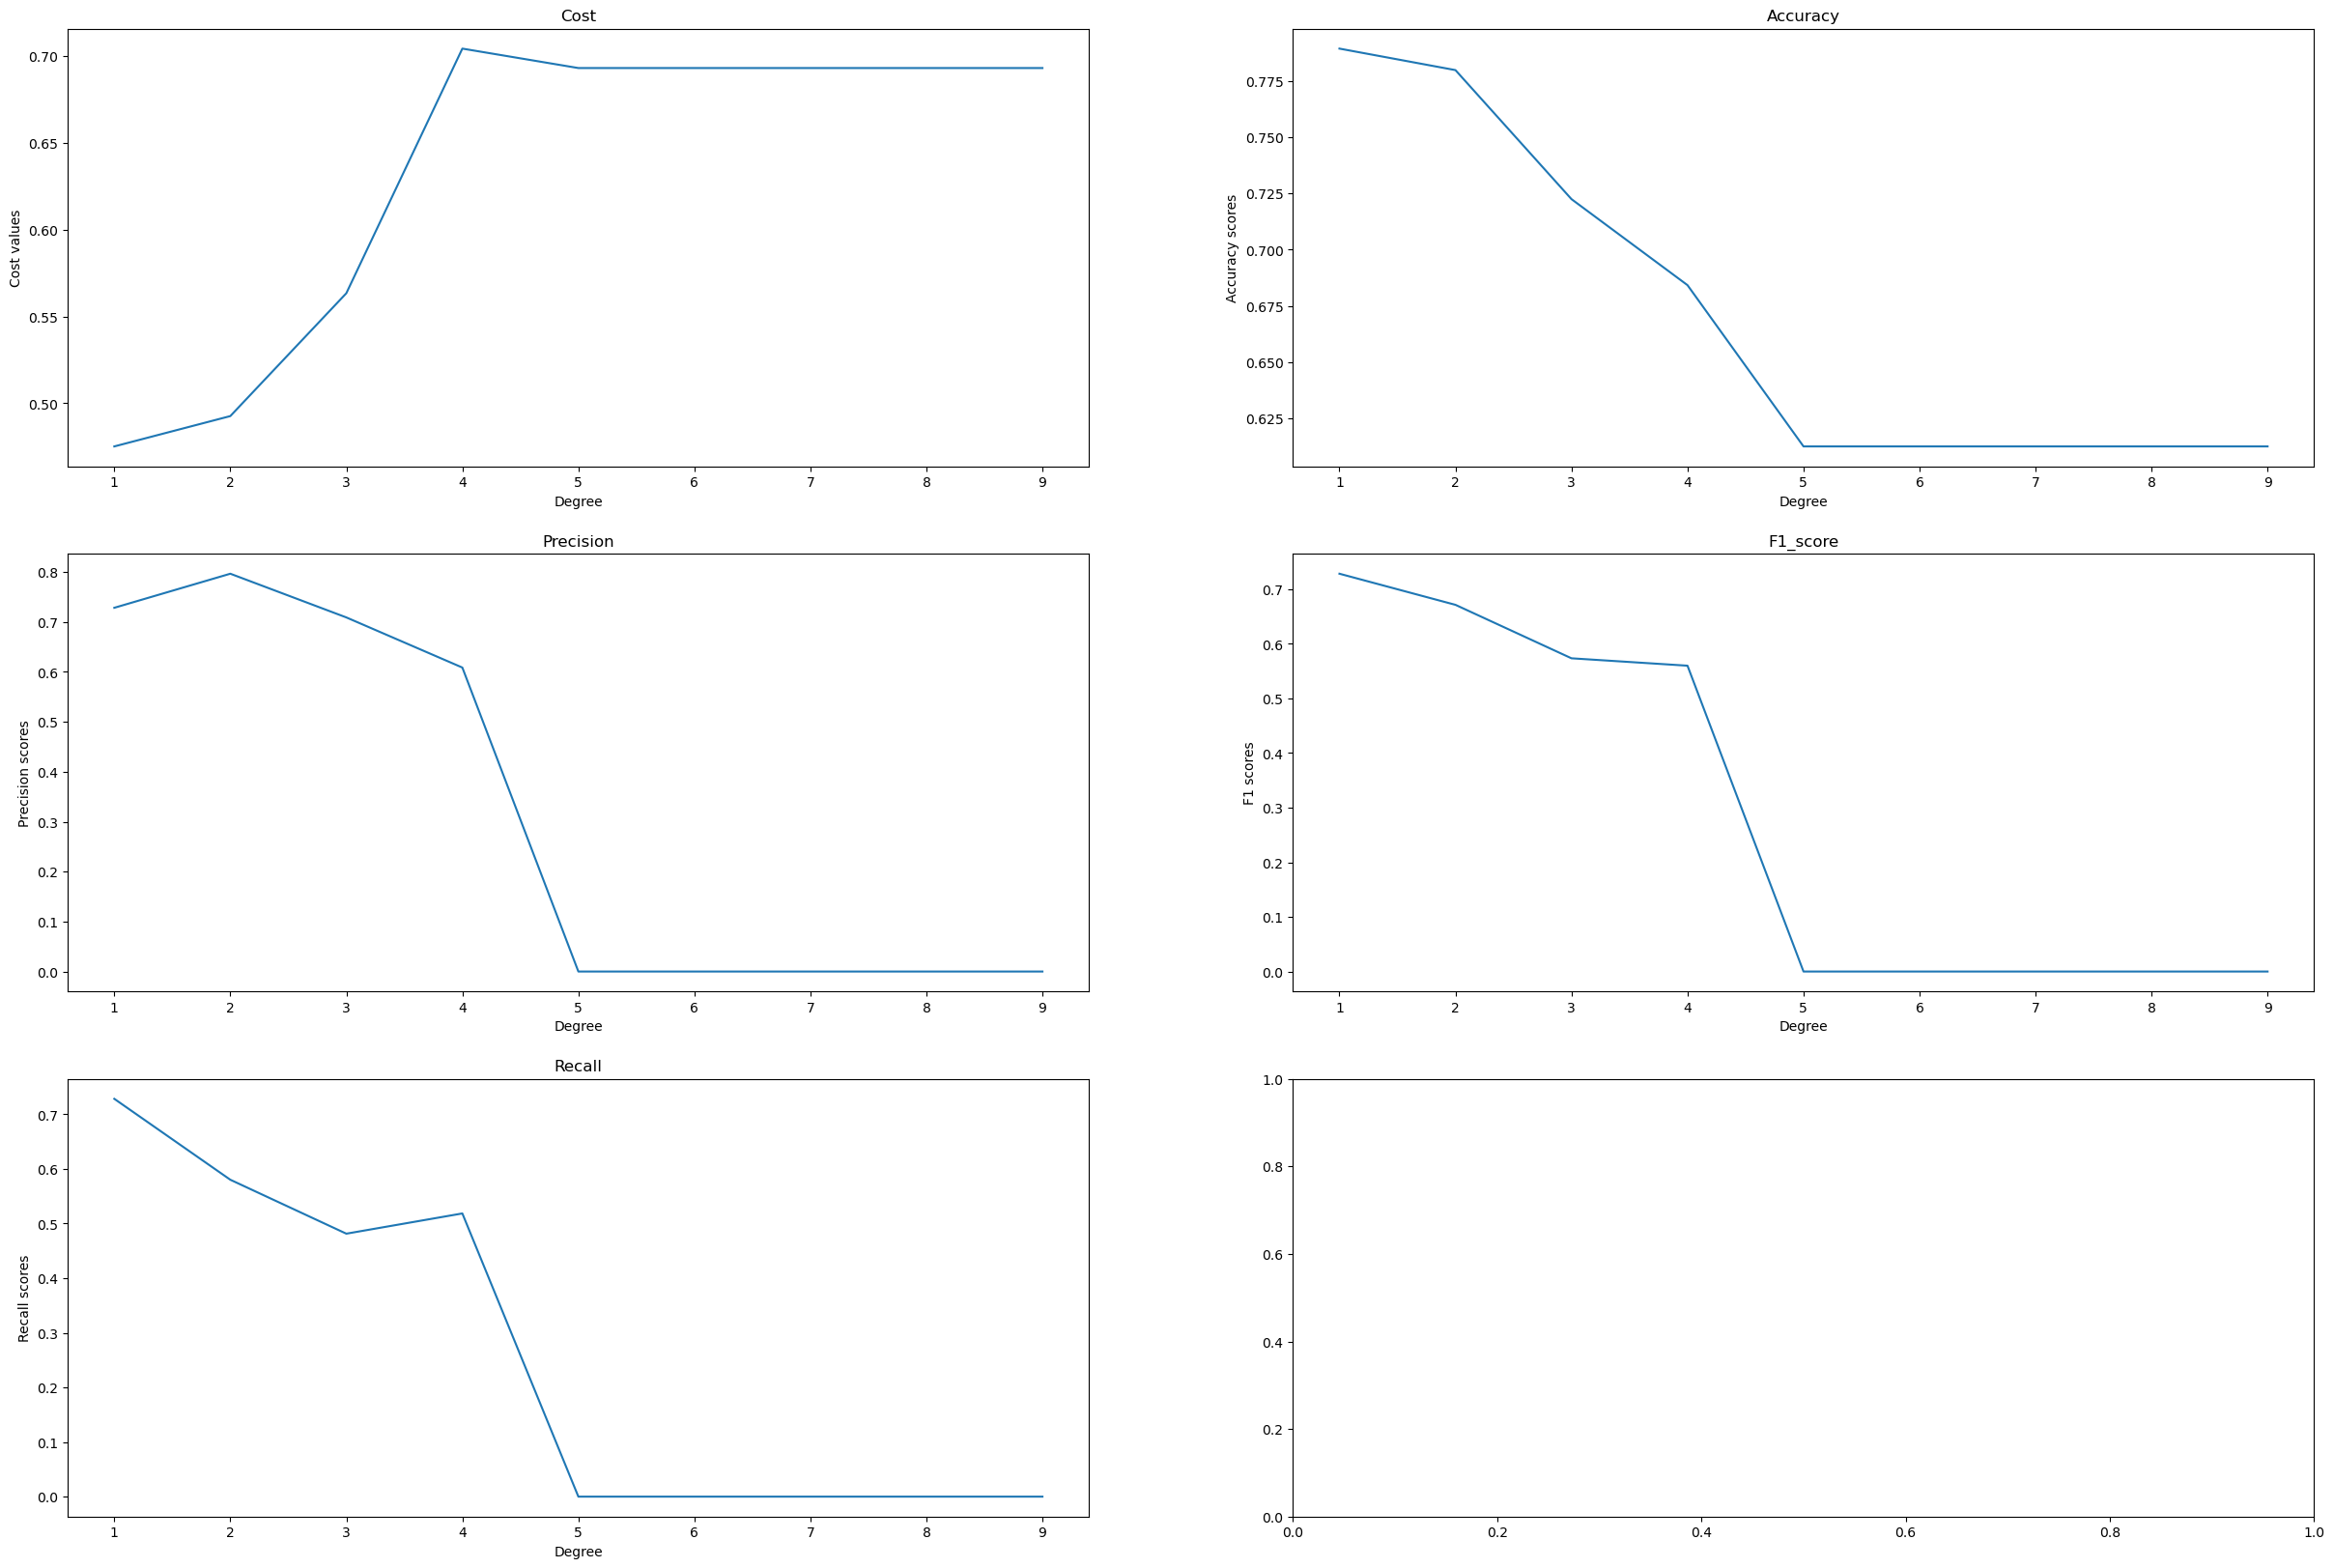

In [4]:
#Construction of the polynomial logistic regression model, and analysis of the cost and performance metrics according to 
#different values of degree


import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

np.random.seed(0)

d=[i for i in range(1,10)]

poly_cost_function_scores=[]
poly_accuracy_scores=[]
poly_precision_scores=[]
poly_f1_scores=[]
poly_recall_scores=[]

for i in d:
    poly_features = PolynomialFeatures(degree=i)

    X_temp_poly=poly_features.fit_transform(X_temp)
    X_test_poly=poly_features.fit_transform(X_test)

    poly_reg=LogisticRegression()
    poly_reg.fit(X_temp_poly,y_temp)
    y_pred=poly_reg.predict(X_test_poly)
    y_pred_proba=poly_reg.predict_proba(X_test_poly)[:,1]
    cost=log_loss(y_test, y_pred_proba)
    poly_cost_function_scores.append(cost)
    accuracy=accuracy_score(y_test, y_pred)
    poly_accuracy_scores.append(accuracy)
    f1=f1_score(y_test, y_pred)
    poly_f1_scores.append(f1)
    precision=precision_score(y_test, y_pred)
    poly_precision_scores.append(precision)
    recall=recall_score(y_test, y_pred)
    poly_recall_scores.append(recall)


fig, axs = plt.subplots(3, 2,figsize=(30, 20))
axs[0,0].plot(d,poly_cost_function_scores)
axs[0,0].set_title("Cost")
axs[0,0].set_xlabel("Degree")
axs[0,0].set_ylabel("Cost values")

axs[0,1].plot(d,poly_accuracy_scores)
axs[0,1].set_title("Accuracy")
axs[0,1].set_xlabel("Degree")
axs[0,1].set_ylabel("Accuracy scores")


axs[1,0].plot(d,poly_precision_scores)
axs[1,0].set_title("Precision")
axs[1,0].set_xlabel("Degree")
axs[1,0].set_ylabel("Precision scores")


axs[1,1].plot(d,poly_f1_scores)
axs[1,1].set_title("F1_score")
axs[1,1].set_xlabel("Degree")
axs[1,1].set_ylabel("F1 scores")


axs[2,0].plot(d,poly_recall_scores)
axs[2,0].set_title("Recall")
axs[2,0].set_xlabel("Degree")
axs[2,0].set_ylabel("Recall scores")



In [5]:
#Performance of the model using the value of degree that provides the minimum cost

from sklearn.preprocessing import PolynomialFeatures

D_cost=d[np.argmin(poly_cost_function_scores)]

poly_features = PolynomialFeatures(degree=D_cost)

X_temp_poly=poly_features.fit_transform(X_temp)
X_test_poly=poly_features.fit_transform(X_test)

poly_reg=LogisticRegression()
poly_reg.fit(X_temp_poly, y_temp)
poly_y_pred=poly_reg.predict(X_test_poly)
poly_y_pred_proba=poly_reg.predict_proba(X_test_poly)[:,1]

poly_coefficients = poly_reg.coef_
poly_intercept = poly_reg.intercept_
poly_log_loss_value = log_loss(y_test, poly_y_pred_proba)
poly_cm=confusion_matrix(y_test, poly_y_pred)
poly_classification_rep = classification_report(y_test, poly_y_pred)


print(poly_y_pred_proba.shape)
print(f"The coefficients found for the model with polynomial features is are: {poly_coefficients} and the intercept is: {intercept}")
print(f"The value of the cost function for the model with polynomial features is {poly_log_loss_value}")
print(f"Confusion matrix for the model with polynomial features is:")
print(poly_cm)
print(f"Classification report for the model with polynomial features is:") 
print(poly_classification_rep)

print(D_cost)

(209,)
The coefficients found for the model with polynomial features is are: [[-1.88655139e-02 -1.08995904e+00 -2.41859009e+00 -3.41442461e-02
  -1.41410876e-04 -2.77108843e-01]] and the intercept is: [4.86827627]
The value of the cost function for the model with polynomial features is 0.4751431704210535
Confusion matrix for the model with polynomial features is:
[[106  22]
 [ 22  59]]
Classification report for the model with polynomial features is:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       128
           1       0.73      0.73      0.73        81

    accuracy                           0.79       209
   macro avg       0.78      0.78      0.78       209
weighted avg       0.79      0.79      0.79       209

1


C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
#Performance of the model using the value of degree that provides the best accuracy score


from sklearn.preprocessing import PolynomialFeatures

D_accuracy=d[np.argmax(poly_accuracy_scores)]

poly_features = PolynomialFeatures(degree=D_accuracy)

X_temp_poly=poly_features.fit_transform(X_temp)
X_test_poly=poly_features.fit_transform(X_test)

poly_reg=LogisticRegression()
poly_reg.fit(X_temp_poly, y_temp)
poly_y_pred=poly_reg.predict(X_test_poly)
poly_y_pred_proba=poly_reg.predict_proba(X_test_poly)[:,1]

poly_coefficients = poly_reg.coef_
poly_intercept = poly_reg.intercept_
poly_log_loss_value = log_loss(y_test, poly_y_pred_proba)
poly_cm=confusion_matrix(y_test, poly_y_pred)
poly_classification_rep = classification_report(y_test, poly_y_pred)


print(poly_y_pred_proba.shape)
print(f"the coefficients found for the model with polynomial features is are: {poly_coefficients} and the intercept is: {intercept}")
print(f"the value of the cost function for the model with polynomial features is {poly_log_loss_value}")
print(f"Confusion matrix for the model with polynomial features is:")
print(poly_cm)
print(f"Classification report for the model with polynomial features is:") 
print(poly_classification_rep)

print(D_accuracy)

(209,)
the coefficients found for the model with polynomial features is are: [[-1.88655139e-02 -1.08995904e+00 -2.41859009e+00 -3.41442461e-02
  -1.41410876e-04 -2.77108843e-01]] and the intercept is: [4.86827627]
the value of the cost function for the model with polynomial features is 0.4751431704210535
Confusion matrix for the model with polynomial features is:
[[106  22]
 [ 22  59]]
Classification report for the model with polynomial features is:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       128
           1       0.73      0.73      0.73        81

    accuracy                           0.79       209
   macro avg       0.78      0.78      0.78       209
weighted avg       0.79      0.79      0.79       209

1


C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Recall scores')

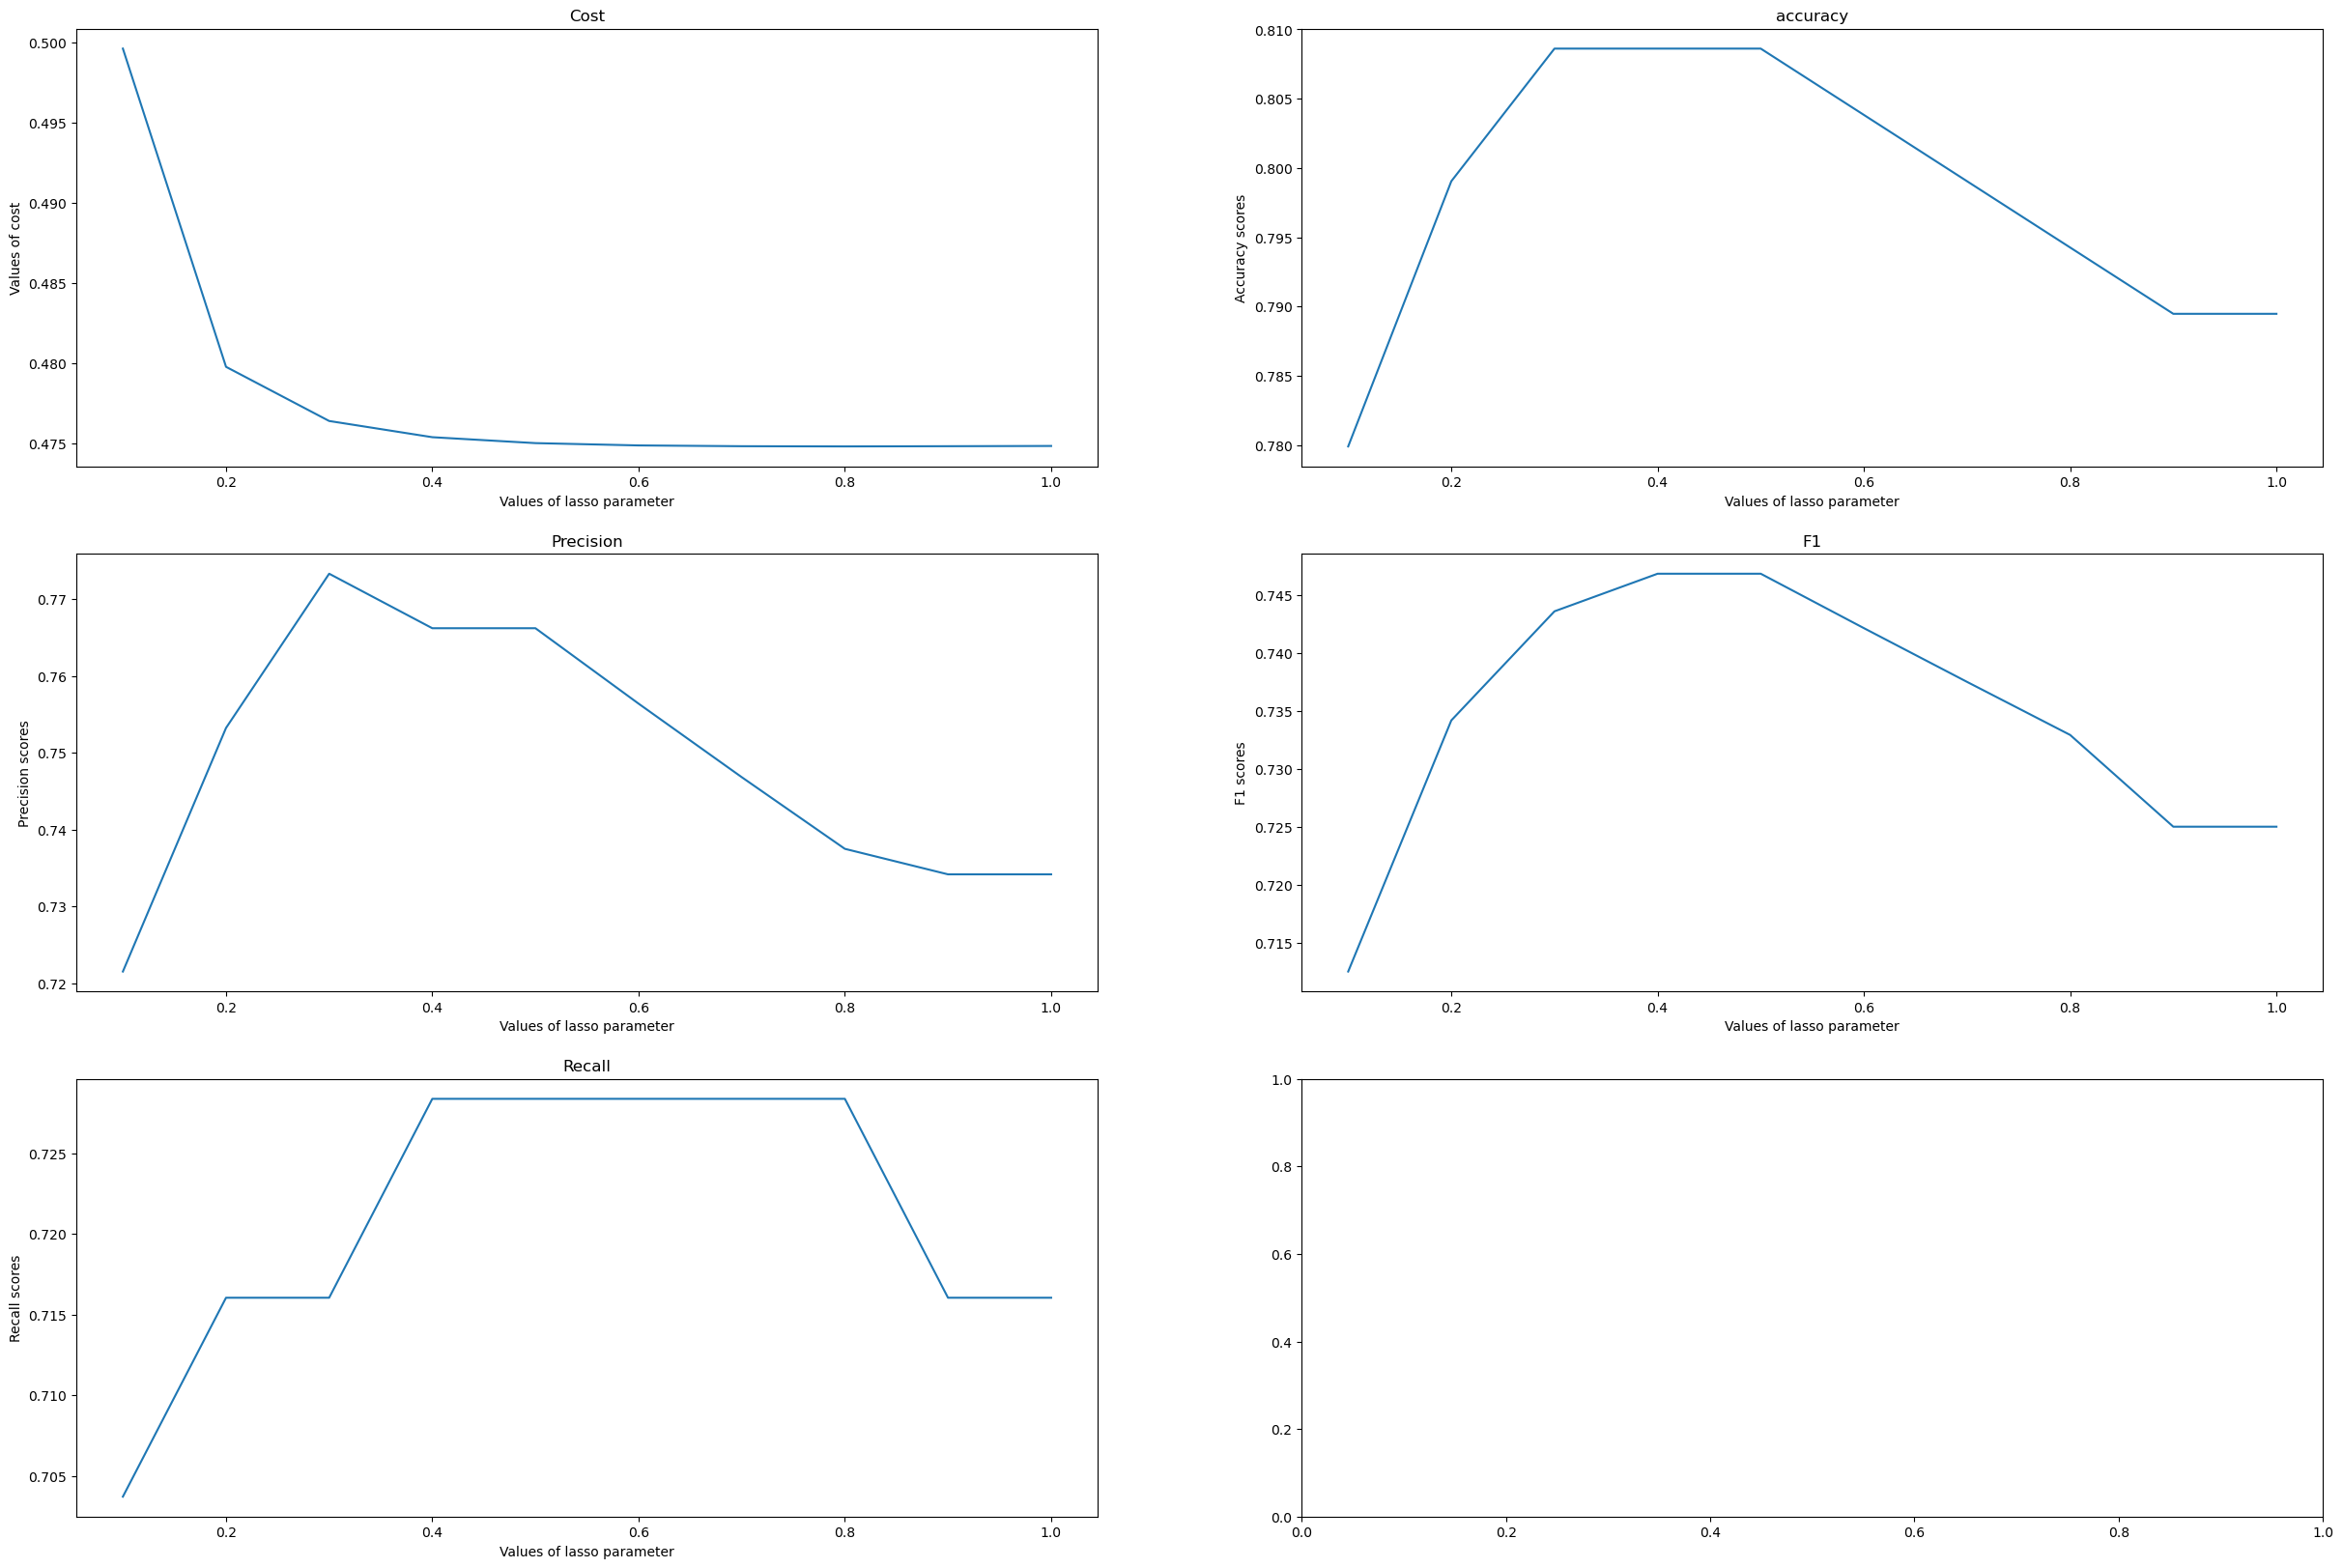

In [7]:
#Construction of the polynomial logistic regression model with lasso regularization, and analysis of the cost and 
#performance metrics according to different values of lasso parameters



import matplotlib.pyplot as plt

np.random.seed(0)


poly_features = PolynomialFeatures(degree=D_cost)

X_temp_poly=poly_features.fit_transform(X_temp)
X_test_poly=poly_features.fit_transform(X_test)

al=[i for i in np.linspace(0.1,1,10)]

lasso_cost_function_scores=[]
lasso_accuracy_scores=[]
lasso_precision_scores=[]
lasso_f1_scores=[]
lasso_recall_scores=[]

for i in al:
    lasso_reg=LogisticRegression(penalty='l1', solver='liblinear', C=i)
    lasso_reg.fit(X_temp_poly,y_temp)
    y_pred=lasso_reg.predict(X_test_poly)
    y_pred_proba=lasso_reg.predict_proba(X_test_poly)[:,1]
    cost=log_loss(y_test, y_pred_proba)
    lasso_cost_function_scores.append(cost)
    accuracy=accuracy_score(y_test, y_pred)
    lasso_accuracy_scores.append(accuracy)
    f1=f1_score(y_test, y_pred)
    lasso_f1_scores.append(f1)
    precision=precision_score(y_test, y_pred)
    lasso_precision_scores.append(precision)
    recall=recall_score(y_test, y_pred)
    lasso_recall_scores.append(recall)


fig, axs = plt.subplots(3, 2,figsize=(30, 20))
axs[0,0].plot(al,lasso_cost_function_scores)
axs[0,0].set_title("Cost")
axs[0,0].set_xlabel("Values of lasso parameter")
axs[0,0].set_ylabel("Values of cost")

axs[0,1].plot(al,lasso_accuracy_scores)
axs[0,1].set_title("accuracy")
axs[0,1].set_xlabel("Values of lasso parameter")
axs[0,1].set_ylabel("Accuracy scores")

axs[1,0].plot(al,lasso_precision_scores)
axs[1,0].set_title("Precision")
axs[1,0].set_xlabel("Values of lasso parameter")
axs[1,0].set_ylabel("Precision scores")

axs[1,1].plot(al,lasso_f1_scores)
axs[1,1].set_title("F1")
axs[1,1].set_xlabel("Values of lasso parameter")
axs[1,1].set_ylabel("F1 scores")

axs[2,0].plot(al,lasso_recall_scores)
axs[2,0].set_title("Recall")
axs[2,0].set_xlabel("Values of lasso parameter")
axs[2,0].set_ylabel("Recall scores")


In [10]:
#Performance of the model using the value of the lasso parameter that provides the minimum cost



AL_cost=al[np.argmin(lasso_cost_function_scores)]
lasso_reg = LogisticRegression(penalty='l1', solver='liblinear', C=AL_cost)
lasso_reg.fit(X_temp_poly, y_temp)
lasso_y_pred=lasso_reg.predict(X_test_poly)
lasso_y_pred_proba=lasso_reg.predict_proba(X_test_poly)[:,1]
lasso_coefficients = lasso_reg.coef_
lass_intercept = lasso_reg.intercept_
lasso_log_loss_value = log_loss(y_test, lasso_y_pred_proba)
lasso_cm=confusion_matrix(y_test, lasso_y_pred)
lasso_classification_rep = classification_report(y_test, lasso_y_pred)


print(lasso_y_pred_proba.shape)
print(f"the coefficients found for the model with lasso regularization are: {lasso_coefficients} and the intercept is: {intercept}")
print(f"the value of the cost function for the model with lasso regularization is {lasso_log_loss_value}")
print(f"Confusion matrix for the model with lasso regularization:")
print(lasso_cm)
print(f"Classification report for the model with lasso regularization:") 
print(lasso_classification_rep)

print(f"The value of the lasso parameter that minimizes the cost is: {AL_cost}")

(209,)
the coefficients found for the model with lasso regularization are: [[ 2.40228518e+00 -1.00768496e+00 -2.40613169e+00 -3.08431589e-02
   6.56310274e-04 -2.41052646e-01]] and the intercept is: [4.86827627]
the value of the cost function for the model with lasso regularization is 0.4748010420716442
Confusion matrix for the model with lasso regularization:
[[107  21]
 [ 22  59]]
Classification report for the model with lasso regularization:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       128
           1       0.74      0.73      0.73        81

    accuracy                           0.79       209
   macro avg       0.78      0.78      0.78       209
weighted avg       0.79      0.79      0.79       209

The value of the lasso parameter that minimizes the cost is: 0.8


In [12]:
#Performance of the model using the value of lasso parameter that provides the best accuracy score


AL_accuracy=al[np.argmax(lasso_accuracy_scores)]

lasso_reg = LogisticRegression(penalty='l1', solver='liblinear', C=AL_accuracy)
lasso_reg.fit(X_temp_poly, y_temp)
lasso_y_pred=lasso_reg.predict(X_test_poly)
lasso_y_pred_proba=lasso_reg.predict_proba(X_test_poly)[:,1]
lasso_coefficients = lasso_reg.coef_
lass_intercept = lasso_reg.intercept_
lasso_log_loss_value = log_loss(y_test, lasso_y_pred_proba)
lasso_cm=confusion_matrix(y_test, lasso_y_pred)
lasso_classification_rep = classification_report(y_test, lasso_y_pred)


print(lasso_y_pred_proba.shape)
print(f"the coefficients found for the model with lasso regularization are: {lasso_coefficients} and the intercept is: {intercept}")
print(f"the value of the cost function for the model with lasso regularization is {lasso_log_loss_value}")
print(f"Confusion matrix for the model with lasso regularization:")
print(lasso_cm)
print(f"Classification report for the model with lasso regularization:") 
print(lasso_classification_rep)

print(f"The value of the lasso parameter that maximizes the accuracy is: {AL_accuracy}")

(209,)
the coefficients found for the model with lasso regularization are: [[ 1.63327251 -0.82901192 -2.25359754 -0.02482412  0.0023312  -0.18190497]] and the intercept is: [4.86827627]
the value of the cost function for the model with lasso regularization is 0.47639474011777405
Confusion matrix for the model with lasso regularization:
[[111  17]
 [ 23  58]]
Classification report for the model with lasso regularization:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       128
           1       0.77      0.72      0.74        81

    accuracy                           0.81       209
   macro avg       0.80      0.79      0.80       209
weighted avg       0.81      0.81      0.81       209

The value of the lasso parameter that maximizes the accuracy is: 0.30000000000000004


C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Text(0, 0.5, 'Recall scores')

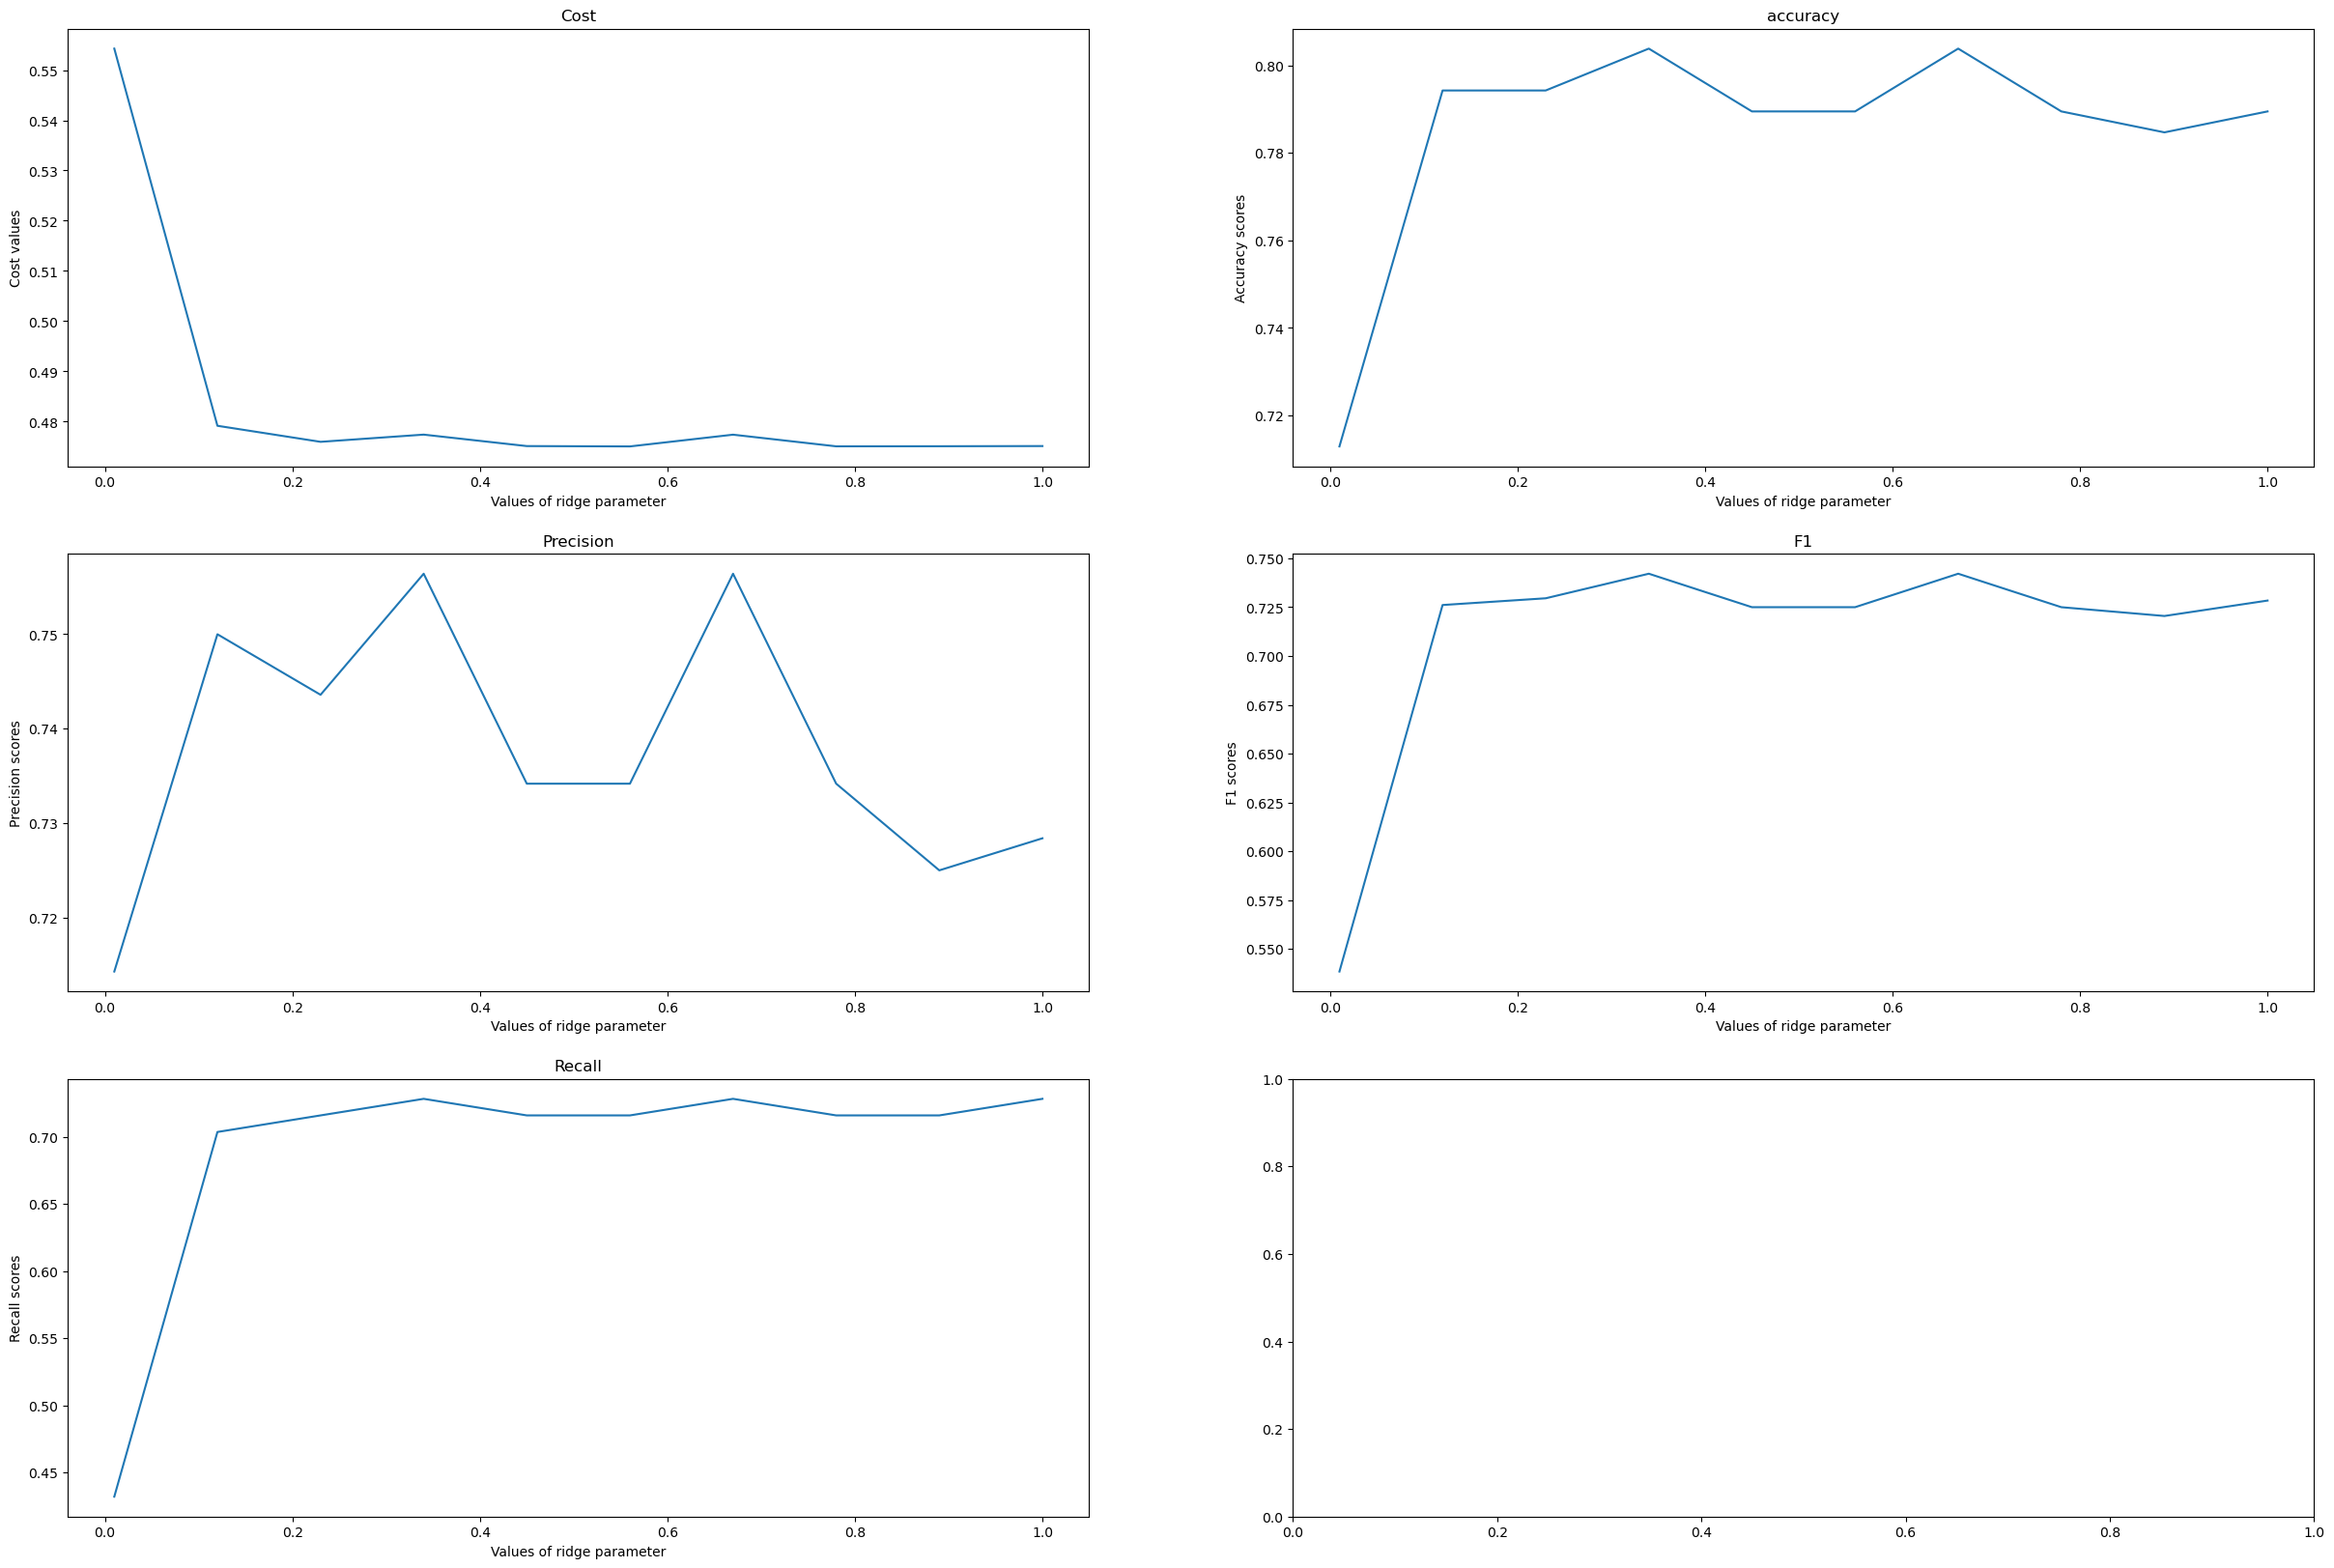

In [13]:
#Construction of the polynomial logistic regression model with ridge regularization, and analysis of the cost and 
#performance metrics according to different values of ridge parameters


import matplotlib.pyplot as plt

np.random.seed(0)


poly_features = PolynomialFeatures(degree=D_cost)

X_temp_poly=poly_features.fit_transform(X_temp)
X_test_poly=poly_features.fit_transform(X_test)

ar=[i for i in np.linspace(0.01,1,10)]

ridge_cost_function_scores=[]
ridge_accuracy_scores=[]
ridge_precision_scores=[]
ridge_f1_scores=[]
ridge_recall_scores=[]

for i in ar:
    ridge_reg=LogisticRegression(penalty='l2', C=i)
    ridge_reg.fit(X_temp_poly,y_temp)
    y_pred=ridge_reg.predict(X_test_poly)
    y_pred_proba=ridge_reg.predict_proba(X_test_poly)[:,1]
    cost=log_loss(y_test, y_pred_proba)
    ridge_cost_function_scores.append(cost)
    accuracy=accuracy_score(y_test, y_pred)
    ridge_accuracy_scores.append(accuracy)
    f1=f1_score(y_test, y_pred)
    ridge_f1_scores.append(f1)
    precision=precision_score(y_test, y_pred)
    ridge_precision_scores.append(precision)
    recall=recall_score(y_test, y_pred)
    ridge_recall_scores.append(recall)


fig, axs = plt.subplots(3, 2,figsize=(30,20))
axs[0,0].plot(ar,ridge_cost_function_scores)
axs[0,0].set_title("Cost")
axs[0,0].set_xlabel("Values of ridge parameter")
axs[0,0].set_ylabel("Cost values")

axs[0,1].plot(ar,ridge_accuracy_scores)
axs[0,1].set_title("accuracy")
axs[0,1].set_xlabel("Values of ridge parameter")
axs[0,1].set_ylabel("Accuracy scores")


axs[1,0].plot(ar,ridge_precision_scores)
axs[1,0].set_title("Precision")
axs[1,0].set_xlabel("Values of ridge parameter")
axs[1,0].set_ylabel("Precision scores")

axs[1,1].plot(ar,ridge_f1_scores)
axs[1,1].set_title("F1")
axs[1,1].set_xlabel("Values of ridge parameter")
axs[1,1].set_ylabel("F1 scores")

axs[2,0].plot(ar,ridge_recall_scores)
axs[2,0].set_title("Recall")
axs[2,0].set_xlabel("Values of ridge parameter")
axs[2,0].set_ylabel("Recall scores")

In [14]:
#Performance of the model using the value of the ridge parameter that provides the minimum cost


Ar_cost=ar[np.argmin(ridge_cost_function_scores)]
ridge_reg = LogisticRegression(penalty='l2', solver='liblinear', C=Ar_cost)
ridge_reg.fit(X_temp_poly, y_temp)
ridge_y_pred=ridge_reg.predict(X_test_poly)
ridge_y_pred_proba=ridge_reg.predict_proba(X_test_poly)[:,1]
ridge_coefficients = ridge_reg.coef_
ridge_intercept = ridge_reg.intercept_
ridge_log_loss_value = log_loss(y_test, ridge_y_pred_proba)
ridge_cm=confusion_matrix(y_test, ridge_y_pred)
ridge_classification_rep = classification_report(y_test, ridge_y_pred)


print(ridge_y_pred_proba.shape)
print(f"the coefficients found for the model with ridge regularization are: {ridge_coefficients} and the intercept is: {intercept}")
print(f"the value of the cost function for the model with ridge regularization is {ridge_log_loss_value}")
print(f"Confusion matrix for the model with ridge regularization:")
print(ridge_cm)
print(f"Classification report for the model with ridge regularization:") 
print(ridge_classification_rep)

print(f"The value of the ridge parameter that minimizes the cost is:{Ar_cost}")

(209,)
the coefficients found for the model with ridge regularization are: [[ 1.91085361e+00 -8.55308772e-01 -2.23811786e+00 -2.55302806e-02
   2.00721683e-03 -2.12303136e-01]] and the intercept is: [4.86827627]
the value of the cost function for the model with ridge regularization is 0.4759216799102934
Confusion matrix for the model with ridge regularization:
[[110  18]
 [ 23  58]]
Classification report for the model with ridge regularization:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       128
           1       0.76      0.72      0.74        81

    accuracy                           0.80       209
   macro avg       0.80      0.79      0.79       209
weighted avg       0.80      0.80      0.80       209

The value of the ridge parameter that minimizes the cost is:0.56


In [16]:
#Performance of the model using the value of the ridge parameter that provides the best accuracy score


Ar_accuracy=ar[np.argmax(ridge_accuracy_scores)]
ridge_reg = LogisticRegression(penalty='l2', solver='liblinear', C=Ar_accuracy)
ridge_reg.fit(X_temp_poly, y_temp)
ridge_y_pred=ridge_reg.predict(X_test_poly)
ridge_y_pred_proba=ridge_reg.predict_proba(X_test_poly)[:,1]
ridge_coefficients = ridge_reg.coef_
ridge_intercept = ridge_reg.intercept_
ridge_log_loss_value = log_loss(y_test, ridge_y_pred_proba)
ridge_cm=confusion_matrix(y_test, ridge_y_pred)
ridge_classification_rep = classification_report(y_test, ridge_y_pred)


print(ridge_y_pred_proba.shape)
print(f"the coefficients found for the model with ridge regularization are: {ridge_coefficients} and the intercept is: {intercept}")
print(f"the value of the cost function for the model with ridge regularization is {ridge_log_loss_value}")
print(f"Confusion matrix for the model with ridge regularization:")
print(ridge_cm)
print(f"Classification report for the model with ridge regularization:") 
print(ridge_classification_rep)

print(f"The value of the ridge parameter that maximizes the accuracy is: {Ar_accuracy}")

(209,)
the coefficients found for the model with ridge regularization are: [[ 1.66469977 -0.74753264 -2.12430663 -0.02193656  0.00305819 -0.18609225]] and the intercept is: [4.86827627]
the value of the cost function for the model with ridge regularization is 0.47842996363202606
Confusion matrix for the model with ridge regularization:
[[111  17]
 [ 23  58]]
Classification report for the model with ridge regularization:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       128
           1       0.77      0.72      0.74        81

    accuracy                           0.81       209
   macro avg       0.80      0.79      0.80       209
weighted avg       0.81      0.81      0.81       209

The value of the ridge parameter that maximizes the accuracy is: 0.34


In [17]:
#Performance of the basic logistic regression model using cross-validation


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

model=LogisticRegression()

cost_function_scores=[]
accuracy_scores=[]
precision_scores=[]
f1_scores=[]
recall_scores=[]

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp,y_temp):
    X_train, X_cv = X_temp.iloc[train_index], X_temp.iloc[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_cv)
    y_pred_proba=model.predict_proba(X_cv)[:, 1]
    
    cost=log_loss(y_cv, y_pred_proba)
    cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    recall_scores.append(recall)
    
mean_cost=np.mean(cost_function_scores)
mean_accuracy=np.mean(accuracy_scores)
mean_precision=np.mean(precision_scores)
mean_f1=np.mean(f1_scores)
mean_recall=np.mean(recall_scores)

print(f"The mean of the cost obtained is : {mean_cost}")
print(f"The mean of the accuracy score obtained is : {mean_accuracy}")
print(f"The mean of the precision score obtained is : {mean_precision}")
print(f"The mean of the F1 score obtained is : {mean_f1}")
print(f"The mean of the recall score obtained is : {mean_recall}")










The mean of the cost obtained is : 0.4724960638258847
The mean of the accuracy score obtained is : 0.77152124322783
The mean of the precision score obtained is : 0.7409054191408548
The mean of the F1 score obtained is : 0.7137371687615375
The mean of the recall score obtained is : 0.6913716547947832


In [18]:
#Performance of the polynomial logistic regression model using cross-validation



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

poly_cost_function_scores=[]
poly_accuracy_scores=[]
poly_precision_scores=[]
poly_f1_scores=[]
poly_recall_scores=[]

poly_features = PolynomialFeatures(degree=D_cost)
X_temp_poly=poly_features.fit_transform(X_temp)

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp_poly,y_temp):
    
    X_train_poly, X_cv_poly = X_temp_poly[train_index], X_temp_poly[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    poly_reg=LogisticRegression()
    poly_reg.fit(X_train_poly,y_train)
    y_pred=poly_reg.predict(X_cv_poly)
    y_pred_proba=poly_reg.predict_proba(X_cv_poly)[:, 1]
    
    cost=log_loss(y_cv, y_pred_proba)
    poly_cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    poly_accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    poly_f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    poly_precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    poly_recall_scores.append(recall)
    
poly_mean_cost=np.mean(poly_cost_function_scores)
poly_mean_accuracy=np.mean(poly_accuracy_scores)
poly_mean_precision=np.mean(poly_precision_scores)
poly_mean_f1=np.mean(poly_f1_scores)
poly_mean_recall=np.mean(poly_recall_scores)

print(f"The mean of the cost obtained is : {poly_mean_cost}")
print(f"The mean of the accuracy score obtained is : {poly_mean_accuracy}")
print(f"The mean of the precision score obtained is : {poly_mean_precision}")
print(f"The mean of the F1 score obtained is : {poly_mean_f1}")
print(f"The mean of the recall score obtained is : {poly_mean_recall}")




The mean of the cost obtained is : 0.47251324302400616
The mean of the accuracy score obtained is : 0.77152124322783
The mean of the precision score obtained is : 0.7409054191408548
The mean of the F1 score obtained is : 0.7137371687615375
The mean of the recall score obtained is : 0.6913716547947832


In [19]:
#Performance of the polynomial logistic regression model with ridge regularization using cross-validation


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

ridge_cost_function_scores=[]
ridge_accuracy_scores=[]
ridge_precision_scores=[]
ridge_f1_scores=[]
ridge_recall_scores=[]

poly_features = PolynomialFeatures(degree=D_cost)
X_temp_poly=poly_features.fit_transform(X_temp)

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp_poly,y_temp):
    
    X_train_poly, X_cv_poly = X_temp_poly[train_index], X_temp_poly[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    ridge_reg=LogisticRegression(penalty='l2', C=Ar_cost)
    ridge_reg.fit(X_train_poly,y_train)
    y_pred=ridge_reg.predict(X_cv_poly)
    y_pred_proba=ridge_reg.predict_proba(X_cv_poly)[:, 1]
    
    cost=log_loss(y_cv, y_pred_proba)
    ridge_cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    ridge_accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    ridge_f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    ridge_precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    ridge_recall_scores.append(recall)
    
ridge_mean_cost=np.mean(ridge_cost_function_scores)
ridge_mean_accuracy=np.mean(ridge_accuracy_scores)
ridge_mean_precision=np.mean(ridge_precision_scores)
ridge_mean_f1=np.mean(ridge_f1_scores)
ridge_mean_recall=np.mean(ridge_recall_scores)

print(f"The mean of the cost obtained is : {ridge_mean_cost}")
print(f"The mean of the accuracy score obtained is : {ridge_mean_accuracy}")
print(f"The mean of the precision score obtained is : {ridge_mean_precision}")
print(f"The mean of the F1 score obtained is : {ridge_mean_f1}")
print(f"The mean of the recall score obtained is : {ridge_mean_recall}")




The mean of the cost obtained is : 0.47279502192076056
The mean of the accuracy score obtained is : 0.7727117194183062
The mean of the precision score obtained is : 0.7438456623983906
The mean of the F1 score obtained is : 0.715117008512857
The mean of the recall score obtained is : 0.692018764372005


In [20]:
#Performance of the polynomial logistic regression model with Lasso regularization using cross-validation


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


lasso_cost_function_scores=[]
lasso_accuracy_scores=[]
lasso_precision_scores=[]
lasso_f1_scores=[]
lasso_recall_scores=[]

poly_features = PolynomialFeatures(degree=D_cost)
X_temp_poly=poly_features.fit_transform(X_temp)

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp_poly,y_temp):
    X_train_poly, X_cv_poly = X_temp_poly[train_index], X_temp_poly[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    
    lasso_reg=LogisticRegression(penalty='l1', solver='liblinear', C=AL_cost)
    lasso_reg.fit(X_train_poly,y_train)
    y_pred=lasso_reg.predict(X_cv_poly)
    y_pred_proba=lasso_reg.predict_proba(X_cv_poly)[:,1]
    
    cost=log_loss(y_cv, y_pred_proba)
    lasso_cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    lasso_accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    lasso_f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    lasso_precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    lasso_recall_scores.append(recall)
    
lasso_mean_cost=np.mean(lasso_cost_function_scores)
lasso_mean_accuracy=np.mean(lasso_accuracy_scores)
lasso_mean_precision=np.mean(lasso_precision_scores)
lasso_mean_f1=np.mean(lasso_f1_scores)
lasso_mean_recall=np.mean(lasso_recall_scores)

print(f"The mean of the cost obtained is : {lasso_mean_cost}")
print(f"The mean of the accuracy score obtained is : {lasso_mean_accuracy}")
print(f"The mean of the precision score obtained is : {lasso_mean_precision}")
print(f"The mean of the F1 score obtained is : {lasso_mean_f1}")
print(f"The mean of the recall score obtained is : {lasso_mean_recall}")



X_test_poly=poly_features.transform(X_test)

y_pred=lasso_reg.predict(X_test_poly)
y_pred_proba=lasso_reg.predict_proba(X_test_poly)[:,1]

cost_final=log_loss(y_test, y_pred_proba)
accuracy_final=accuracy_score(y_test, y_pred)
f1_final=f1_score(y_test, y_pred)
precision_final=precision_score(y_test, y_pred)
recall_final=recall_score(y_test, y_pred)

print(f"The final cost obtained is : {cost_final}")
print(f"The final accuracy score obtained is : {lasso_mean_accuracy}")
print(f"The final precision score obtained is : {lasso_mean_precision}")
print(f"The final F1 score obtained is : {lasso_mean_f1}")
print(f"The final recall score obtained is : {lasso_mean_recall}")


The mean of the cost obtained is : 0.4731712087364497
The mean of the accuracy score obtained is : 0.7798830909609353
The mean of the precision score obtained is : 0.7523481515143626
The mean of the F1 score obtained is : 0.7242187880418764
The mean of the recall score obtained is : 0.7005531210971512
The final cost obtained is : 0.47728748008731103
The final accuracy score obtained is : 0.7798830909609353
The final precision score obtained is : 0.7523481515143626
The final F1 score obtained is : 0.7242187880418764
The final recall score obtained is : 0.7005531210971512


In [26]:
#Performance of the basic logistic regression model using cross-validation and feature scaling


from sklearn import preprocessing

model=LogisticRegression()

cost_function_scores=[]
accuracy_scores=[]
precision_scores=[]
f1_scores=[]
recall_scores=[]

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp,y_temp):
    X_train, X_cv = X_temp.iloc[train_index], X_temp.iloc[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    scaler = preprocessing.MinMaxScaler()
    X_train_norm=scaler.fit_transform(X_train)
    X_cv_norm=scaler.transform(X_cv)
    
    
    model.fit(X_train_norm,y_train)
    y_pred=model.predict(X_cv_norm)
    y_pred_proba=model.predict_proba(X_cv_norm)[:, 1]
    
    cost=log_loss(y_cv, y_pred_proba)
    cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    recall_scores.append(recall)
    
mean_cost=np.mean(cost_function_scores)
mean_accuracy=np.mean(accuracy_scores)
mean_precision=np.mean(precision_scores)
mean_f1=np.mean(f1_scores)
mean_recall=np.mean(recall_scores)

print(f"The mean of the cost obtained is : {mean_cost}")
print(f"The mean of the accuracy score obtained is : {mean_accuracy}")
print(f"The mean of the precision score obtained is : {mean_precision}")
print(f"The mean of the F1 score obtained is : {mean_f1}")
print(f"The mean of the recall score obtained is : {mean_recall}")

The mean of the cost obtained is : 0.47156053175560125
The mean of the accuracy score obtained is : 0.7786926147704591
The mean of the precision score obtained is : 0.7488065982818688
The mean of the F1 score obtained is : 0.7240057867826702
The mean of the recall score obtained is : 0.7036781210971512


In [27]:
#Performance of the polynomial logistic regression model using cross-validation and feature scaling


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

poly_cost_function_scores=[]
poly_accuracy_scores=[]
poly_precision_scores=[]
poly_f1_scores=[]
poly_recall_scores=[]



for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp_poly,y_temp):    
    X_train, X_cv = X_temp.iloc[train_index], X_temp.iloc[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    scaler = preprocessing.MinMaxScaler()
    X_train_norm=scaler.fit_transform(X_train)
    X_cv_norm=scaler.transform(X_cv)
    
    poly_features = PolynomialFeatures(degree=D_cost)
    X_train_poly_norm=poly_features.fit_transform(X_train_norm)
    X_cv_poly_norm=poly_features.transform(X_cv_norm)
    
    poly_reg=LogisticRegression()
    poly_reg.fit(X_train_poly_norm,y_train)
    y_pred=poly_reg.predict(X_cv_poly_norm)
    y_pred_proba=poly_reg.predict_proba(X_cv_poly_norm)[:, 1]
    
    cost=log_loss(y_cv, y_pred_proba)
    poly_cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    poly_accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    poly_f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    poly_precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    poly_recall_scores.append(recall)
    
poly_mean_cost=np.mean(poly_cost_function_scores)
poly_mean_accuracy=np.mean(poly_accuracy_scores)
poly_mean_precision=np.mean(poly_precision_scores)
poly_mean_f1=np.mean(poly_f1_scores)
poly_mean_recall=np.mean(poly_recall_scores)

print(f"The mean of the cost obtained is : {poly_mean_cost}")
print(f"The mean of the accuracy score obtained is : {poly_mean_accuracy}")
print(f"The mean of the precision score obtained is : {poly_mean_precision}")
print(f"The mean of the F1 score obtained is : {poly_mean_f1}")
print(f"The mean of the recall score obtained is : {poly_mean_recall}")




The mean of the cost obtained is : 0.4715603770256182
The mean of the accuracy score obtained is : 0.7786926147704591
The mean of the precision score obtained is : 0.7488065982818688
The mean of the F1 score obtained is : 0.7240057867826702
The mean of the recall score obtained is : 0.7036781210971512


In [28]:
#Performance of the polynomial logistic regression model with ridge regularization using cross-validation and feature scaling


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

ridge_cost_function_scores=[]
ridge_accuracy_scores=[]
ridge_precision_scores=[]
ridge_f1_scores=[]
ridge_recall_scores=[]



for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp_poly,y_temp):
    
    X_train, X_cv = X_temp.iloc[train_index], X_temp.iloc[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    scaler = preprocessing.MinMaxScaler()
    X_train_norm=scaler.fit_transform(X_train)
    X_cv_norm=scaler.transform(X_cv)
    
    poly_features = PolynomialFeatures(degree=D_cost)
    X_train_poly_norm=poly_features.fit_transform(X_train_norm)
    X_cv_poly_norm=poly_features.transform(X_cv_norm)
    
    ridge_reg=LogisticRegression(penalty='l2', C=Ar_cost)
    ridge_reg.fit(X_train_poly_norm,y_train)
    y_pred=ridge_reg.predict(X_cv_poly_norm)
    y_pred_proba=ridge_reg.predict_proba(X_cv_poly_norm)[:, 1]
    
    cost=log_loss(y_cv, y_pred_proba)
    ridge_cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    ridge_accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    ridge_f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    ridge_precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    ridge_recall_scores.append(recall)
    
ridge_mean_cost=np.mean(ridge_cost_function_scores)
ridge_mean_accuracy=np.mean(ridge_accuracy_scores)
ridge_mean_precision=np.mean(ridge_precision_scores)
ridge_mean_f1=np.mean(ridge_f1_scores)
ridge_mean_recall=np.mean(ridge_recall_scores)

print(f"The mean of the cost obtained is : {ridge_mean_cost}")
print(f"The mean of the accuracy score obtained is : {ridge_mean_accuracy}")
print(f"The mean of the precision score obtained is : {ridge_mean_precision}")
print(f"The mean of the F1 score obtained is : {ridge_mean_f1}")
print(f"The mean of the recall score obtained is : {ridge_mean_recall}")




The mean of the cost obtained is : 0.4729750193115546
The mean of the accuracy score obtained is : 0.7786854861705161
The mean of the precision score obtained is : 0.7483486112476343
The mean of the F1 score obtained is : 0.7242395174769275
The mean of the recall score obtained is : 0.7040633950697539


In [29]:
#Performance of the polynomial logistic regression model with lasso regularization using cross-validation and feature scaling



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


lasso_cost_function_scores=[]
lasso_accuracy_scores=[]
lasso_precision_scores=[]
lasso_f1_scores=[]
lasso_recall_scores=[]



for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=0).split(X_temp_poly,y_temp):
    
    X_train, X_cv = X_temp.iloc[train_index], X_temp.iloc[test_index]
    y_train, y_cv = y_temp.iloc[train_index], y_temp.iloc[test_index]
    
    scaler = preprocessing.MinMaxScaler()
    X_train_norm=scaler.fit_transform(X_train)
    X_cv_norm=scaler.transform(X_cv)
    
    poly_features = PolynomialFeatures(degree=D_cost)
    X_train_poly_norm=poly_features.fit_transform(X_train_norm)
    X_cv_poly_norm=poly_features.transform(X_cv_norm)
    
    
    lasso_reg=LogisticRegression(penalty='l1', solver='liblinear', C=AL_cost)
    lasso_reg.fit(X_train_poly_norm,y_train)
    y_pred=lasso_reg.predict(X_cv_poly_norm)
    y_pred_proba=lasso_reg.predict_proba(X_cv_poly_norm)[:,1]
    
    cost=log_loss(y_cv, y_pred_proba)
    lasso_cost_function_scores.append(cost)
    
    accuracy=accuracy_score(y_cv, y_pred)
    lasso_accuracy_scores.append(accuracy)
    f1=f1_score(y_cv, y_pred)
    lasso_f1_scores.append(f1)
    precision=precision_score(y_cv, y_pred)
    lasso_precision_scores.append(precision)
    recall=recall_score(y_cv, y_pred)
    lasso_recall_scores.append(recall)
    
lasso_mean_cost=np.mean(lasso_cost_function_scores)
lasso_mean_accuracy=np.mean(lasso_accuracy_scores)
lasso_mean_precision=np.mean(lasso_precision_scores)
lasso_mean_f1=np.mean(lasso_f1_scores)
lasso_mean_recall=np.mean(lasso_recall_scores)

print(f"The mean of the cost obtained is : {lasso_mean_cost}")
print(f"The mean of the accuracy score obtained is : {lasso_mean_accuracy}")
print(f"The mean of the precision score obtained is : {lasso_mean_precision}")
print(f"The mean of the F1 score obtained is : {lasso_mean_f1}")
print(f"The mean of the recall score obtained is : {lasso_mean_recall}")


X_test_norm=scaler.transform(X_test)
X_test_poly_norm=poly_features.transform(X_test_norm)

y_pred=lasso_reg.predict(X_test_poly_norm)
y_pred_proba=lasso_reg.predict_proba(X_test_poly_norm)[:,1]

cost_final=log_loss(y_test, y_pred_proba)
accuracy_final=accuracy_score(y_test, y_pred)
f1_final=f1_score(y_test, y_pred)
precision_final=precision_score(y_test, y_pred)
recall_final=recall_score(y_test, y_pred)

print(f"The final cost obtained is : {cost_final}")
print(f"The final accuracy score obtained is : {lasso_mean_accuracy}")
print(f"The final precision score obtained is : {lasso_mean_precision}")
print(f"The final F1 score obtained is : {lasso_mean_f1}")
print(f"The final recall score obtained is : {lasso_mean_recall}")


The mean of the cost obtained is : 0.4716651416328334
The mean of the accuracy score obtained is : 0.7822640433418877
The mean of the precision score obtained is : 0.7558582401276824
The mean of the F1 score obtained is : 0.7275993641535258
The mean of the recall score obtained is : 0.7036781210971512
The final cost obtained is : 0.47683866673041286
The final accuracy score obtained is : 0.7822640433418877
The final precision score obtained is : 0.7558582401276824
The final F1 score obtained is : 0.7275993641535258
The final recall score obtained is : 0.7036781210971512
